In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img


In [ ]:
lt=[cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
  value = random.uniform(0.5,2)
  hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  hsv=np.array(hsv, dtype = np.float64)
  hsv[:,:,1] = hsv[:,:,1]*value
  hsv[:,:,1][hsv[:,:,1]>255] = 255
  hsv[:,:,2] = hsv[:,:,2]*value
  hsv[:,:,2][hsv[:,:,2]>255] = 255
  hsv=np.array(hsv, dtype = np.uint8)
  img=cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
  return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
import glob
directory=pathlib.Path("/content/drive/MyDrive/arts")

In [ ]:
resultant="/content/augumentedimages"

In [ ]:
items = os.listdir(directory)

classes = []
count = 0
images = []
labels = []

for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5, 10)

    while a != 0:
        img = cv2.imread(path1)
        img = cv2.resize(img, (224,224))
        k = i.split(".")[0]

        # Save the original image
        cv2.imwrite(f"{resultant}/{k}{i1}.jpeg", img)
        images.append(img)
        labels.append(count)

        img = cv2.rotate(img, lt[random.randint(0, 2)])  # Rotate the image

        # Save the rotated image
        cv2.imwrite(f"{resultant}/{k}{i1 + 1}.jpeg", img)
        images.append(img)
        labels.append(count)

        # Apply brightness adjustment (only for even rotations)
        if a % 2 == 0:
            img = brightness(img)
            # Save the brightness-adjusted image
            cv2.imwrite(f"{resultant}/{k}{i1 + 2}.jpeg", img)
            images.append(img)
            labels.append(count)

        a -= 1
        i1 += 3  # Increment by 3 for the three image variations

    count += 1

# Convert the lists to NumPy arrays
images = np.array(images, dtype=np.uint8)
labels = np.array(labels)

print(images.size)


mosaicart.jpg
3Dart.jpg
scumblingart.jpg
stipplingart.jpg
pastelart.jpg
pixelart.jpg
caricatureart.jpg
doodle.jpg
sandart.jpg
sketchart.jpg
warliart.jpg
zentangleart.jpg
36126720


In [31]:
from keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import *
from tensorflow.keras.applications import MobileNetV2

In [33]:
model=MobileNetV2(weights="imagenet")
for i in model.layers:

  i.trainable=False



14536120/14536120 [==============================] - 0s 0us/step


In [34]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [35]:
transferMB=Sequential()
for i in range(18):
  transferMB.add(model.layers[i])
transferMB.add(Flatten())
transferMB.add(Dense(512,activation="relu"))
transferMB.add(Dense(218,activation="relu"))
transferMB.add(Dense(13,activation="softmax"))

In [36]:
transferMB.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 Conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 expanded_conv_depthwise (D  (None, 112, 112, 32)      288       
 epthwiseConv2D)                                                 
                                                                 
 expanded_conv_depthwise_BN  (None, 112, 112, 32)      128       
  (BatchNormalization)                                           
                                                      

In [41]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self,epoch,logs={}):
    print("call")
    if(logs.get('accuracy')>.99):
       print("\nReached %2.2f%% accuracy,so stopping training !!" %(99))

       self.model.stop_training=True
callbacks=myCallback()
transferMB.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferMB.fit(images,labels,epochs=10,callbacks=[callbacks])


Epoch 1/10
8/8 [==============================] - 10s 994ms/step - loss: 421.1049 - accuracy: 0.1750
Epoch 2/10
8/8 [==============================] - 11s 1s/step - loss: 395.7211 - accuracy: 0.4292
Epoch 3/10
8/8 [==============================] - 8s 1s/step - loss: 114.7623 - accuracy: 0.6042
Epoch 4/10
8/8 [==============================] - 14s 2s/step - loss: 7.0565 - accuracy: 0.9125
Epoch 5/10
8/8 [==============================] - 8s 999ms/step - loss: 2.7712 - accuracy: 0.9542
Epoch 6/10
8/8 [==============================] - 12s 1s/step - loss: 0.6520 - accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - ETA: 0s - loss: 4.9671e-09 - accuracy: 1.0000call

Reached 99.00% accuracy,so stopping training !!
8/8 [==============================] - 9s 1s/step - loss: 4.9671e-09 - accuracy: 1.0000


In [42]:
transferMB.evaluate(images,labels)

8/8 [==============================] - 4s 449ms/step - loss: 1.9272e-07 - accuracy: 1.0000


[1.9271723772362748e-07, 1.0]

In [43]:
def predict(i,transferVGG,labels):
  path1=f"{directory}/{i}"
  img=cv2.imread(path1)
  img=cv2.resize(img,(224,224))
  a=np.argmax(transferVGG.predict(np.array([img])))
  img=cv2.putText(img,labels[a],(25,25),cv2.FONT_HERSHEY_SIMPLEX,1,(225,225,0),3,cv2.LINE_AA)
  plt.imshow(img)

In [44]:
print(classes)

['mosaicart.jpg', '3Dart.jpg', 'scumblingart.jpg', 'stipplingart.jpg', 'pastelart.jpg', 'pixelart.jpg', 'caricatureart.jpg', 'doodle.jpg', 'sandart.jpg', 'sketchart.jpg', 'warliart.jpg', 'zentangleart.jpg']


1/1 [==============================] - 0s 178ms/step


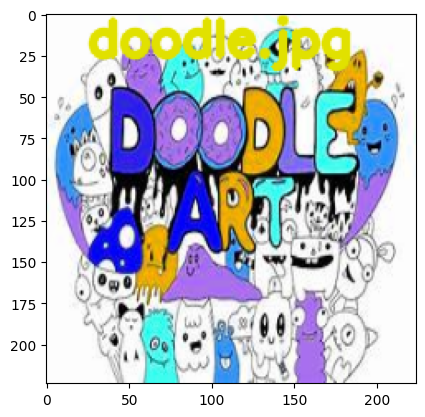

In [45]:
predict("doodle.jpg",transferMB,classes)